## Runtime

In [1]:
import sys

#if True, will install via pypi, else will install from source
stable = True

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !pip install --quiet scvi-tools[tutorials]==0.9.1

In [2]:
if IN_COLAB:
    import gdown
    url = 'https://drive.google.com/uc?id=1tJSOI9ve0i78WmszMLx2ul8F8tGycBTd'
    output = 'FL_celltype.csv'
    gdown.download(url, output, quiet=False)

In [3]:
import scvi
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import time

In [4]:
adata = scvi.data.dataset_10x("fresh_68k_pbmc_donor_a")
adata.var_names_make_unique()
adata.obs_names_make_unique()

INFO     Downloading file at data/10X/fresh_68k_pbmc_donor_a/filtered_gene_bc_matrices.tar.gz
Downloading...: 100%|██████████| 124443/124443.0 [00:02<00:00, 45794.69it/s]
INFO     Extracting tar file                                                                 


In [5]:
marker_gene_mat = pd.read_csv('data/FL_celltype.csv', index_col=0)

In [6]:
marker_gene_mat = marker_gene_mat.drop(index='TRAC')

In [7]:
bdata = adata[:, marker_gene_mat.index].copy()
scvi.data.setup_anndata(bdata)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 68579 cells, 23 vars, 1 batches, 1
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [10]:
num_samples = []
times = []
n = bdata.n_obs
while n > 1000:
    cdata = bdata[:n].copy()
    scvi.data.setup_anndata(cdata)
    start = time.time()
    model = scvi.external.CellAssign(cdata, marker_gene_mat, "n_counts")
    model.train()
    end = time.time()
    times += [end - start]
    num_samples += [cdata.n_obs]
    print(end - start)
    n = n // 2
#     bdata = sc.pp.subsample(bdata, fraction=0.5, copy=True)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 68579 cells, 23 vars, 1 batches, 1
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 340/400:  85%|████████▌ | 340/400 [01:54<00:20,  2.97it/s, loss=72.4, v_num=1]
114.59993028640747
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 34289 cells, 23 vars, 1 batches, 1
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until 

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 282/400:  70%|███████   | 282/400 [00:48<00:20,  5.84it/s, loss=77.4, v_num=1]
48.27886652946472
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 17144 cells, 23 vars, 1 batches, 1
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until m

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:36<00:00, 11.03it/s, loss=70.4, v_num=1]
36.27116823196411
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 8572 cells, 23 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until m

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:19<00:00, 20.88it/s, loss=82.5, v_num=1]
19.164595127105713
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 4286 cells, 23 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until 

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:10<00:00, 36.63it/s, loss=81.9, v_num=1]
10.929171800613403
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 2143 cells, 23 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until 

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:06<00:00, 58.57it/s, loss=87.4, v_num=1]
6.837259292602539
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 1071 cells, 23 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until m

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:04<00:00, 82.95it/s, loss=79.9, v_num=1]
4.830204725265503


In [11]:
df = pd.DataFrame(data={'n_obs':num_samples,'time':times})
df

,n_obs,time
0,68579,114.599930
1,34289,48.278867
2,17144,36.271168
3,8572,19.164595
4,4286,10.929172
5,2143,6.837259
6,1071,4.830205


<AxesSubplot:xlabel='n_obs'>

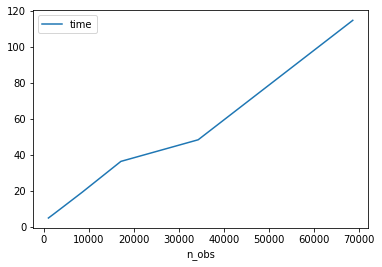

In [12]:
df.plot(x='n_obs',y='time')

### R code

```R
library(SingleCellExperiment)
library(cellassign)
library(readr)

pbmc <- readRDS("data/pbmc.rds")
marker_mat <- read_csv("data/FL_celltype.csv")
marker_mat <- marker_mat[-c(24),]
col <- marker_mat[,1]
rownames <- col[['Gene']]
counts(pbmc) <- assay(pbmc, "X")
mm <- data.matrix(marker_mat)
mm <- mm[,-1]
rownames(mm) <- rownames
times <- c()
n <- 68579
i <- 1
s <- colSums(counts(pbmc))
while (n > 1000){
ptm <- proc.time()
fit <- cellassign(exprs_obj = pbmc[rownames,1:n], 
                  marker_gene_info = mm,
                  s=s[1:n],
                  learning_rate = 1e-2, 
                  shrinkage = TRUE,
                  verbose = TRUE)
times[i] <- proc.time() - ptm
i <- i + 1
n <- n %/% 2
}
df <- data.frame(counts = counts, times = times)
write.csv(df, "data/cell_assign_r_runtime.csv")
```